# OpenScope's Sequence Learning Dataset

Adaptive and coordinated behavior requires that an animal be able to make predictions about the near and even far future. This intuition that some neural computations should be ‘predictive’ in their character has a long history, starting with ideas about how the receptive field structure of retinal ganglion cells relate to the statistics of natural visual scenes. Ideas about predictive computation have been most influential in thinking about the function of the neocortex. Here, the relatively stereotyped local circuitry of the neocortex has long led to speculation that each local circuit might be carrying out a somewhat similar, fundamental computation on its specific inputs. In addition, the organization of sensory-motor pathways into hierarchies (e.g., V1  V2  V4  IT in the ventral visual stream) with stereotyped feedforward and feedback connections has motivated ideas about hierarchical predictive codes, where higher levels of the hierarchy send predictions down to the lower level that then compares its inputs against the predictions and only send the surprises up the hierarchy (such as in the work of Mumford, Rao & Ballard, and Friston).  [include references?]
	Despite the wide influence of ideas about predictive coding, there is relatively little experimental evidence that such computations occur in multiple cortical areas, perhaps serving as a ‘canonical computation’ of the neocortical microcircuit. Our experimental design is based on a Sequence Learning Experiment, in which head-fixed mice passively view sequences of three different natural movie clips (labeled ‘A’, ‘B’, ‘C’), each having a duration of 2 seconds (Figure 1). We begin with one recording session (day #0), where the movie clips are presented in random order along with a 2 second grey screen (labeled ‘X’). Each stimulus occurs a total of 525 times, allowing a thorough characterization of neural responses before any sequence learning has occurred. Next, there are 3 recording sessions where the three movie clips are presented in a repeating temporal sequence, ABCABC…, for 500 times, in order to train the mouse’s brain. This training allows the mouse to potentially use the identity of the current movie clip predict the next movie clip. In addition, each sequence training session includes a period of random-order presentation, in order to assess changes in neural tuning during sequence learning. Finally, our last session (day #4) had stimuli presented in random order, allowing us to test more thoroughly how responses changed due to sequence learning.

 

![seq_fig1.png](../../data/images/sequence_learning_fig1.png)

What makes the predictive coding hypothesis so powerful and interesting is the idea that these computations might be repeated in many different cortical microcircuits. Therefore, our design uses 2-photon microscopy with eight simultaneously recorded fields-of-view. The fields-of-view will include both layer 2/3 and layer 4 as well as from multiple cortical areas: V1 (VISp), LM (VISl), AM (VISam), and PM (VISpm). 

In the ascending sensory pathway, signals enter layer 4 and then pass on to layer 2/3, before leaving for other cortical areas. Thus, layers 4 and 2/3 represent two different image processing steps with different tuning properties. For instance, in the primary visual cortex, neurons in layer 4 primarily have simple-cell receptive fields, while those in layer 2/3 primarily have complex-cell receptive fields. By recording simultaneously in both layers, we can compare the predictive computations present in these two stages of sensory processing in the local microcircuit.

The mouse visual system has roughly 10 visual areas organized into three hierarchical levels. Cortical area LM is thought to be most analogous to area V2 in the cat and primate, where the ventral stream is associated with processing ‘what’ an image is. Cortical area PM is an extra-striate area that may be related to the dorsal stream in cats and primates. Finally, cortical area AM is thought to be hierarchically higher than area PM. Together, these recordings from extra-striate visual areas allows us to compare the predictive computations present in different stages of the cortical hierarchy.

To these ends, the experiment used the Cux2-CreERTS2:Camk2a-tTa; Ai93(TITL-GCaMP6f) mouse line, which has expression in excitatory neurons of both layer 4 and 2/3.

### Environment Setup
⚠️**Note: If running on a new environment, run this cell once and then restart the kernel**⚠️

In [1]:
import warnings
warnings.filterwarnings('ignore')

try:
    from databook_utils.dandi_utils import dandi_download_open
except:
    !git clone https://github.com/AllenInstitute/openscope_databook.git
    %cd openscope_databook
    %pip install -e .
    %cd docs/projects

In [2]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_interactions import hyperslicer
from scipy import interpolate
from scipy.stats import ttest_ind

%matplotlib inline

### The Experiment
Here is an overview of the experimental sessions.


| Day   | Stimulus          | Cre Line  |		Depth	 |		Visual Areas		 | Mice |
| ----- | ----------------- | --------- | -------------- | ------------------------- | ---- |
| 0	    | random order		| Cux2		|	layer 2/3, 4 |	VISp, VISl, VISam, VISpm |	13  |
| 1	    | repeated sequence | Cux2		|	layer 2/3, 4 |	VISp, VISl, VISam, VISpm |	13  |
| 2	    | repeated sequence	| Cux2		|	layer 2/3, 4 |	VISp, VISl, VISam, VISpm |	13  |
| 3	    | repeated sequence	| Cux2		|	layer 2/3, 4 |	VISp, VISl, VISam, VISpm |	13  |
| 4     | random order		| Cux2		|	layer 2/3, 4 |	VISp, VISl, VISam, VISpm |	13  |


For each mouse, we wanted to be able to compare the same neurons across different days. This meant that the field-of-view needed to be the same, which is technically challenging. The comparison between day #0 and day #4 was very important, but it was less important to record every day during the temporal sequence training. At the same time, it was important for all mice to receive a similar training profile. Even if a recording session did not match the initial field-of-view successfully, the animal still experienced the same passive visual exposure. Therefore, some animals did not have matching fields-of-view across all recording sessions.

In addition, it is important to be able to test what influence running has on observed predictive computations. This requires that an animal spent sufficient fractions of its session both running and not-running, in order to compare those two conditions. To this end, some sessions were repeated when the animal failed to run sufficiently. Priority was given to having sufficient running on the day #4 session. Thus, this session was repeated in a number of animals. 

Overall, each of the 13 animals included in the DANDI Archive had a unique profile of recording sessions. For this release of the Sequential Learning project, Openscope has pre-released its session files on the [DANDI Archive](http://dandiarchive.org). The following table gives a summary of all the files from the 13 mice in this dataset. 8 files are produced from each experimental session, one for each imaging plane, and up to 6 sessions are conducted with each mouse. This table was generated from [Getting Experimental Metadata from DANDI](../basics/get_dandiset_metadata.ipynb).


In [3]:
session_files = pd.read_csv("../../data/seqlearn_sessions.csv")
session_files

,identifier,size,path,session_time,sub_name,session_id,experiment_id,container_id,group,group_count,...,location,fov_height,fov_width,specimen_name,sub_sex,sub_age,sub_genotype,stim_types,#_rois,session_end
0,54ef3052-b5e3-4b4e-bb45-f52dc3cd51d5,611963690,sub-683238/sub-683238_ses-1290764951-acq-12909...,2023-08-17 15:53:00.715000+00:00,683238,1290764951,1290925536,0,0,4,...,VISp,512,512,683238,M,P102.0D,Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6...,"{'movie_clip_C_presentations', 'movie_clip_A_p...",6.0,4225.186957
1,321318fa-92e3-478e-9a9e-1f936c98a88e,614435247,sub-683238/sub-683238_ses-1290764951-acq-12909...,2023-08-17 15:53:00.715000+00:00,683238,1290764951,1290925539,0,1,4,...,VISam,512,512,683238,M,P102.0D,Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6...,"{'movie_clip_C_presentations', 'movie_clip_A_p...",8.0,4225.186957
2,aa669f14-dcb7-4c2e-84a2-a1e56fe45f5b,672054874,sub-683238/sub-683238_ses-1290478480-acq-12906...,2023-08-16 16:14:57.107000+00:00,683238,1290478480,1290677809,0,2,4,...,VISl,512,512,683238,M,P101.0D,Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6...,"{'movie_clip_C_presentations', 'movie_clip_A_p...",55.0,4225.507187
3,32ad8d9b-d0b8-4e26-8d9b-9c6b7b9cdaff,605819194,sub-683238/sub-683238_ses-1290764951-acq-12909...,2023-08-17 15:53:00.715000+00:00,683238,1290764951,1290925546,0,3,4,...,VISpm,512,512,683238,M,P102.0D,Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6...,"{'movie_clip_C_presentations', 'movie_clip_A_p...",1.0,4225.186957
4,ab8c128a-6ef8-4428-adcd-8f147792e007,635301629,sub-683238/sub-683238_ses-1290478480-acq-12906...,2023-08-16 16:14:57.107000+00:00,683238,1290478480,1290677812,0,3,4,...,VISpm,512,512,683238,M,P101.0D,Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6...,"{'movie_clip_C_presentations', 'movie_clip_A_p...",25.0,4225.507187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,af44ff99-675a-45b1-a76c-a0088f212cfa,773728346,sub-703102/sub-703102_ses-1329359032-acq-13294...,2024-02-08 22:44:23.467000+00:00,703102,1329359032,1329483516,0,0,4,...,VISp,512,512,703102,F,P149.0D,Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6...,"{'movie_clip_C_presentations', 'movie_clip_A_p...",139.0,4226.527517
411,1d986a09-b354-4e5b-8b54-7e32a895cf58,836353816,sub-703102/sub-703102_ses-1327686864-acq-13277...,2024-02-01 23:10:22.241000+00:00,703102,1327686864,1327789159,0,2,4,...,VISl,512,512,703102,F,P142.0D,Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6...,"{'movie_clip_C_presentations', 'movie_clip_A_p...",189.0,4226.375887
412,db263fd3-aa49-4877-9185-eb82723a7644,686873138,sub-703102/sub-703102_ses-1329110536-acq-13292...,2024-02-07 23:12:42.563000+00:00,703102,1329110536,1329223381,0,3,4,...,VISpm,512,512,703102,F,P148.0D,Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6...,"{'movie_clip_C_presentations', 'movie_clip_A_p...",68.0,4226.744487
413,6544d9ad-9262-4bcf-ad2a-2b3c84016700,690380810,sub-703102/sub-703102_ses-1329359032-acq-13294...,2024-02-08 22:44:23.467000+00:00,703102,1329359032,1329483519,0,1,4,...,VISam,512,512,703102,F,P149.0D,Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6...,"{'movie_clip_C_presentations', 'movie_clip_A_p...",71.0,4226.527517


In [4]:
n_sessions = len(session_files["session_id"].value_counts())
subjects_info = session_files.groupby(["specimen_name", "sub_sex"]).size().reset_index().to_dict()
m_count = len([sex for sex in subjects_info["sub_sex"].values() if sex == "M"])
f_count = len([sex for sex in subjects_info["sub_sex"].values() if sex == "F"])

print("Dandiset Overview:")
print(len(session_files), "files")
print(len(subjects_info["specimen_name"]), "subjects", m_count, "males", f_count,"females")

Dandiset Overview:
415 files
10 subjects 6 males 4 females


### Downloading Ophys File
The files can be downloaded from the DANDI Archive. For a more detailed explanation of downloading and opening these files, see  [Downloading an NWB file](../download_nwb.ipynb). Here, we take one file for each of the stimulus regimes used in this project; the sequentially repeated stimulus and the randomly ordered stimulus. 

In [5]:
dandiset_id = "000617"
sequence_dandi_filepath = "sub-683238/sub-683238_ses-1290764951-acq-1290925536_image+ophys.nwb"
random_dandi_filepath = "sub-683238/sub-683238_ses-1292201855-acq-1292348932_image+ophys.nwb"
download_loc = "."
dandi_api_key = os.environ["DANDI_API_KEY"]

In [6]:
# This can sometimes take a while depending on the size of the file
seq_io = dandi_download_open(dandiset_id, sequence_dandi_filepath, download_loc, dandi_api_key=dandi_api_key)
seq_nwb = seq_io.read()

# This can sometimes take a while depending on the size of the file
rand_io = dandi_download_open(dandiset_id, random_dandi_filepath, download_loc, dandi_api_key=dandi_api_key)
rand_nwb = rand_io.read()

A newer version (0.66.3) of dandi/dandi-cli is available. You are using 0.61.2


File already exists
Opening file
File already exists
Opening file


### Imaging Data
Our Ophys files include lab metadata and imaging_planes objects which entail the information about the location being imaged, shown below. These files were chosen such that they are from the same mouse and were imaged at approximately the same depth.

In [7]:
print("Subject ID",seq_nwb.subject.subject_id)
print('Imaging Depth', seq_nwb.lab_meta_data['metadata'].imaging_depth)
print('Location', seq_nwb.imaging_planes['imaging_plane_1'].location)

Subject ID 683238
Imaging Depth 171
Location VISp


In [8]:
print("Subject ID",rand_nwb.subject.subject_id)
print('Imaging Depth', rand_nwb.lab_meta_data['metadata'].imaging_depth)
print('Location', rand_nwb.imaging_planes['imaging_plane_1'].location)

Subject ID 683238
Imaging Depth 157
Location VISp


### Stimulus Templates
The files for the Sequential Learning project contain the movies used as visual stimulus, referred to as stim templates. The project contain three main stimulus movies with regular forward playback. Below, screenshots from each of the movies are displayed, and one of the movies can be played embedded within this notebook. The key used can be changed to view different stim templates.

In [9]:
seq_nwb.stimulus_template.keys()

dict_keys(['gray', 'movie_clip_A', 'movie_clip_B', 'movie_clip_C'])

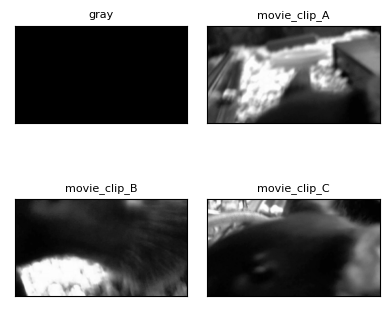

In [10]:
n_cols = 2
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*2, n_rows*2))

if len(axes.shape) == 1:
    axes = axes.reshape((1, axes.shape[0]))

for i, template_name in enumerate(seq_nwb.stimulus_template.keys()):
    template_img = seq_nwb.stimulus_template[template_name].data[:,:,0]
    template_img = np.rot90(template_img, k=3)

    ax_row = int(i / n_cols)
    ax_col = i % n_cols
    axes[ax_row][ax_col].imshow(template_img, cmap="gray")
    axes[ax_row][ax_col].set_title(template_name, fontsize=8)

for ax in axes.flat:
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

fig.tight_layout()

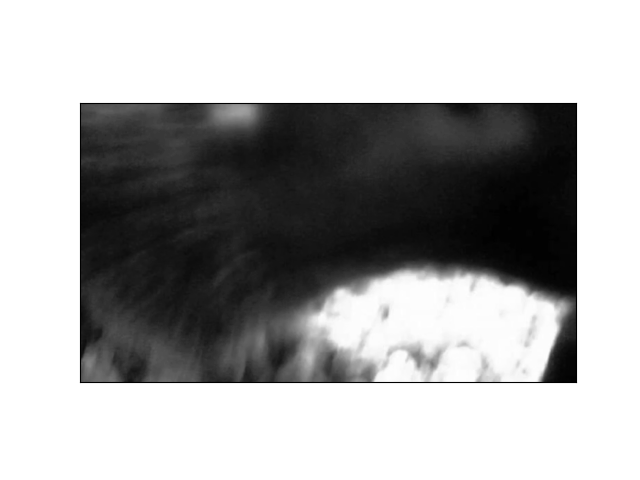

In [11]:
%matplotlib ipympl
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

# change this key to view other stim template movies
template_key = "movie_clip_B"
template = seq_nwb.stimulus_template[template_key].data
template = np.transpose(template)
view = hyperslicer(template, play_buttons=True, cmap="gray")

### Selecting Stimulus Times
In order to analyze the data, the precise timing of the stimulus is required. This information is stored in a set of tables, one for each stimulus video. These are used to select trial times of interest. Here, frame 0 of Movie B is chosen, somewhat arbitrarily. But in the functions `seq_stim_select` and `rand_stim_select` below, the criteria can be modified to suit different analyses.

In [12]:
seq_stim_table = seq_nwb.intervals["movie_clip_B_presentations"]
seq_stim_table[:10]

,start_time,stop_time,stimulus_name,stimulus_block,frame,color,contrast,opacity,orientation,size,units,stimulus_index,tags,timeseries
id,,,,,,,,,,,,,,
0,23.60209,23.61874,movie_clip_B,1.0,0.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,1.0,[stimulus_time_interval],"[(120, 1, timestamps pynwb.base.TimeSeries at ..."
1,23.61874,23.63541,movie_clip_B,1.0,1.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,1.0,[stimulus_time_interval],"[(121, 1, timestamps pynwb.base.TimeSeries at ..."
2,23.63541,23.65209,movie_clip_B,1.0,2.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,1.0,[stimulus_time_interval],"[(122, 1, timestamps pynwb.base.TimeSeries at ..."
3,23.65209,23.66880,movie_clip_B,1.0,3.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,1.0,[stimulus_time_interval],"[(123, 1, timestamps pynwb.base.TimeSeries at ..."
4,23.66880,23.68550,movie_clip_B,1.0,4.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,1.0,[stimulus_time_interval],"[(124, 1, timestamps pynwb.base.TimeSeries at ..."
5,23.68550,23.70216,movie_clip_B,1.0,5.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,1.0,[stimulus_time_interval],"[(125, 1, timestamps pynwb.base.TimeSeries at ..."
6,23.70216,23.71885,movie_clip_B,1.0,6.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,1.0,[stimulus_time_interval],"[(126, 1, timestamps pynwb.base.TimeSeries at ..."
7,23.71885,23.73550,movie_clip_B,1.0,7.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,1.0,[stimulus_time_interval],"[(127, 1, timestamps pynwb.base.TimeSeries at ..."
8,23.73550,23.75220,movie_clip_B,1.0,8.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,1.0,[stimulus_time_interval],"[(128, 1, timestamps pynwb.base.TimeSeries at ..."


In [13]:
print("Avg frame diff:", np.mean(np.diff(seq_stim_table.start_time)))
print("Frame nums:", set(seq_stim_table.frame))

seq_stim_select = lambda row: row.frame.item() == 0.0
seq_stim_times = [float(seq_stim_table[i].start_time) for i in range(len(seq_stim_table)) if seq_stim_select(seq_stim_table[i])]
print("Selected stim times:", len(seq_stim_times))

Avg frame diff: 0.0538156237900486
Frame nums: {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0}
Selected stim times: 650


In [14]:
rand_stim_table = rand_nwb.intervals["movie_clip_B_presentations"]
rand_stim_table[:10]

,start_time,stop_time,stimulus_name,stimulus_block,frame,color,contrast,opacity,orientation,size,units,stimulus_index,tags,timeseries
id,,,,,,,,,,,,,,
0,22.58692,22.60360,movie_clip_B,1.0,0.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,1.0,[stimulus_time_interval],"[(120, 1, timestamps pynwb.base.TimeSeries at ..."
1,22.60360,22.62027,movie_clip_B,1.0,1.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,1.0,[stimulus_time_interval],"[(121, 1, timestamps pynwb.base.TimeSeries at ..."
2,22.62027,22.63695,movie_clip_B,1.0,2.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,1.0,[stimulus_time_interval],"[(122, 1, timestamps pynwb.base.TimeSeries at ..."
3,22.63695,22.65363,movie_clip_B,1.0,3.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,1.0,[stimulus_time_interval],"[(123, 1, timestamps pynwb.base.TimeSeries at ..."
4,22.65363,22.67031,movie_clip_B,1.0,4.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,1.0,[stimulus_time_interval],"[(124, 1, timestamps pynwb.base.TimeSeries at ..."
5,22.67031,22.68700,movie_clip_B,1.0,5.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,1.0,[stimulus_time_interval],"[(125, 1, timestamps pynwb.base.TimeSeries at ..."
6,22.68700,22.70367,movie_clip_B,1.0,6.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,1.0,[stimulus_time_interval],"[(126, 1, timestamps pynwb.base.TimeSeries at ..."
7,22.70367,22.72035,movie_clip_B,1.0,7.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,1.0,[stimulus_time_interval],"[(127, 1, timestamps pynwb.base.TimeSeries at ..."
8,22.72035,22.73710,movie_clip_B,1.0,8.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,1.0,[stimulus_time_interval],"[(128, 1, timestamps pynwb.base.TimeSeries at ..."


In [15]:
print("Avg frame diff:", np.mean(np.diff(rand_stim_table.start_time)))
print("Frame nums:", set(rand_stim_table.frame))

rand_stim_select = lambda row: row.frame.item() == 0.0
rand_stim_times = [float(rand_stim_table[i].start_time) for i in range(len(rand_stim_table)) if rand_stim_select(rand_stim_table[i])]
print("Selected stim times:", len(rand_stim_times))

Avg frame diff: 0.0662480567945523
Frame nums: {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0}
Selected stim times: 525


### Extracting ROI Fluorescence
Below the 2-Photon Fluorescence data is extracted. Firstly, the imaging FOV for one session is shown with the session's average projection, as well as the output of our cell segmentation algorithm, which identifies the cells (called regions-of-interest, or ROIs) from which the fluorescence traces were recorded. The raw fluorescence is normalized into DF/F % in order to eliminate sources of noise and day-to-day variability. The `seq_dff_trace` and `rand_dff_trace` arrays are 2D arrays pulled from the files which contain these recordings throughout the session for each ROI. They should have a shape (n_measurments x n_rois). They come with their respective arrays, `seq_dff_timestamps` and `rand_dff_timestamps`, that record the timestamp at which each measurement was taken.

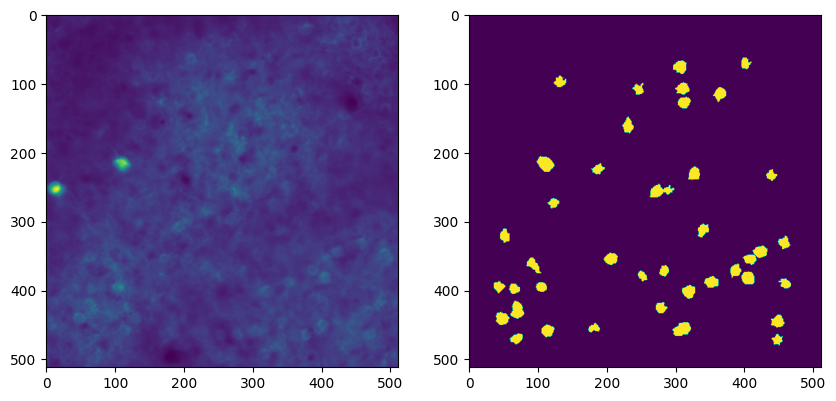

In [16]:
%matplotlib inline
fig, axes = plt.subplots(1,2, figsize=(10,30))
axes[0].imshow(rand_nwb.processing['ophys']['images']['average_image'])
axes[1].imshow(rand_nwb.processing['ophys']['images']['segmentation_mask_image'])

In [17]:
seq_dff = seq_nwb.processing["ophys"]["dff"]
seq_dff_trace = np.array(seq_dff.roi_response_series["traces"].data)
seq_dff_timestamps = np.array(seq_dff.roi_response_series["traces"].timestamps)

print(seq_dff_trace.shape)
print(seq_dff_timestamps.shape)

seq_avg_dff_trace = np.average(seq_dff_trace, axis=1)

(39976, 6)
(39976,)


In [18]:
rand_dff = rand_nwb.processing["ophys"]["dff"]
rand_dff_trace = np.array(rand_dff.roi_response_series["traces"].data)
rand_dff_timestamps = np.array(rand_dff.roi_response_series["traces"].timestamps)

print(rand_dff_trace.shape)
print(rand_dff_timestamps.shape)

rand_avg_dff_trace = np.average(rand_dff_trace, axis=1)

(39975, 43)
(39975,)


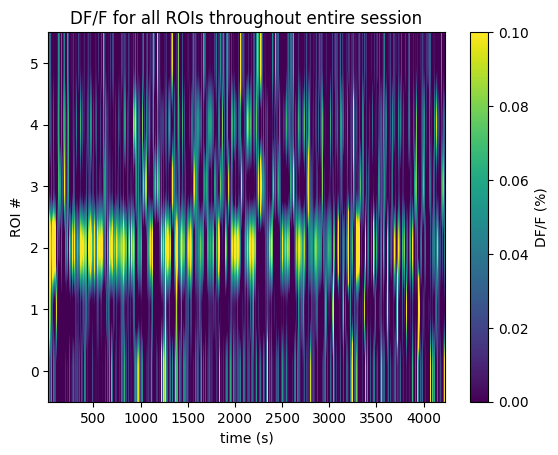

In [19]:
%matplotlib inline
n_rois = seq_dff_trace.shape[1]
plt.imshow(seq_dff_trace.transpose(), extent=[seq_dff_timestamps[0], seq_dff_timestamps[-1], 0, n_rois], aspect='auto', vmin=0, vmax=0.1)
plt.yticks(np.arange(n_rois)+0.5, np.arange(n_rois))
plt.ylabel("ROI #")
plt.xlabel("time (s)")
plt.title("DF/F for all ROIs throughout entire session")
cbar = plt.colorbar()
cbar.set_label('DF/F (%)')


### Extracting Running
The recording of the mouse's running on the wheel is also recored as an array with accompanying timestamps, shown below.

In [20]:
seq_running = seq_nwb.processing["running"]["speed"]
seq_running_trace = np.array(seq_running.data)
seq_running_timestamps = np.array(seq_running.timestamps)

print(seq_running_trace.shape)
print(seq_running_timestamps.shape)

(252000,)
(252000,)


In [21]:
rand_running = rand_nwb.processing["running"]["speed"]
rand_running_trace = np.array(rand_running.data)
rand_running_timestamps = np.array(rand_running.timestamps)

print(rand_running_trace.shape)
print(rand_running_timestamps.shape)

(252000,)
(252000,)


Text(0.5, 1.0, 'Mouse running throughout session')

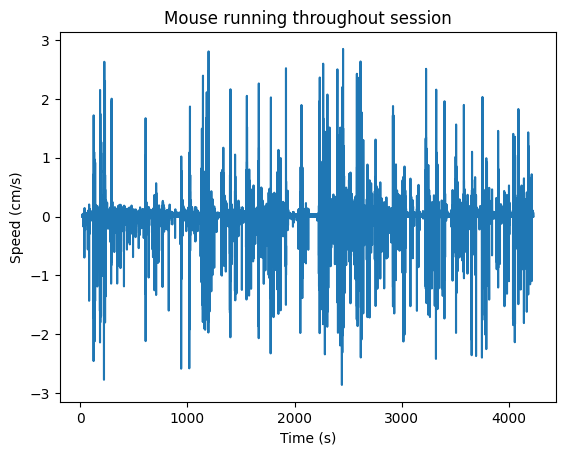

In [22]:
plt.plot(seq_running_timestamps, seq_running_trace)
plt.xlabel("Time (s)")
plt.ylabel("Speed (cm/s)")
plt.title("Mouse running throughout session")

### Session Timeline
To get a good idea of the order and the way stimulus is shown throughout the session, the code below generates a timeline of the various 'epochs' of stimulus. It can be seen that the sessions either have fully randomized order of the three stim movies and grey, or a repeated sequence of the three movies. Note that due to the way the plot draws and mixes thin bands of color, the epochs in the sequential plot might seem like large blocks, when in fact they repeat quickly. A zoomed-in plot is shown for a clearer view.

In [23]:
# extract epoch times from stim table where stimulus rows have a different 'block' than following row
# returns list of epochs, where an epoch is of the form (stimulus name, stimulus block, start time, stop time)
def extract_epochs_from_table(stim_name, stim_table, epochs):
    
    # specify a current epoch stop and start time
    epoch_start = stim_table.start_time[0]
    epoch_stop = stim_table.stop_time[0]

    # for each row, try to extend current epoch stop_time
    for i in range(len(stim_table)):
        this_block = stim_table.stimulus_block[i]
        # if end of table, end the current epoch
        if i+1 >= len(stim_table):
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            break
            
        next_block = stim_table.stimulus_block[i+1]
        # if next row is the same stim block, push back epoch_stop time
        if next_block == this_block:
            epoch_stop = stim_table.stop_time[i+1]
        # otherwise, end the current epoch, start new epoch
        else:
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            epoch_start = stim_table.start_time[i+1]
            epoch_stop = stim_table.stop_time[i+1]
    
    return epochs

In [24]:
def extract_all_epochs(nwb):
    # extract epochs from all valid stimulus tables
    epochs = []
    for stim_name in nwb.intervals.keys():
        stim_table = nwb.intervals[stim_name]
        try:
            epochs = extract_epochs_from_table(stim_name, stim_table, epochs)
        except:
            continue
    return epochs

In [25]:
%matplotlib inline
### make plot of chosen trace over time with colored epoch sections

def plot_trace_over_epochs(trace_arrs, timestamps_arrs, epochs, time_start=None, time_end=None, title=None, trace_labels=None, yaxlabels=None, xlabel=None):
    assert len(trace_arrs) == len(timestamps_arrs), "there must be an equal number of traces and timestamps arrays"
    if trace_labels is not None:
        assert len(trace_arrs) == len(trace_labels), "there must be an equal number of traces and trace labels arrays"
    if yaxlabels is not None:
        assert len(trace_arrs) == len(yaxlabels),  "there must be an equal number of traces and y-axis labels arrays"

    fig, ax = plt.subplots(figsize=(15,5))
    if time_start is None:
        time_start = np.min(np.concatenate(timestamps_arrs))
    if time_end is None:
        time_end = np.max(np.concatenate(timestamps_arrs))

    # filter epochs which aren't at least partially in the time window
    bounded_epochs = {epoch for epoch in epochs if epoch[2] < time_end and epoch[3] > time_start}

    # assign unique color to each stimulus name
    stim_names = list({epoch[0] for epoch in bounded_epochs})
    colors = plt.cm.rainbow(np.linspace(0,1,len(stim_names)))
    stim_color_map = {stim_names[i]:colors[i] for i in range(len(stim_names))}

    key = {}
    
    y_hi = np.max(np.concatenate(trace_arrs)) # change these to manually set height of the plot
    y_lo = np.min(np.concatenate(trace_arrs))
    # draw colored rectangles for each epoch
    for epoch in bounded_epochs:
        stim_name, stim_block, epoch_start, epoch_end = epoch
        color = stim_color_map[stim_name]
        rec = ax.add_patch(mpl.patches.Rectangle((epoch_start, y_lo), epoch_end-epoch_start, 100, alpha=0.3, facecolor=color))
        key[(stim_name)] = rec

    ax.set_xlim(time_start, time_end)
    ax.set_ylim(y_lo, y_hi)
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if title is not None:
        ax.set_title(title)
    if yaxlabels is not None:
        ax.set_ylabel("\n".join(yaxlabels))

    for i in range(len(trace_arrs)):
        # next_color = plt.rcParams["axes.prop_cycle"].by_key()["color"][i]
        # this_ax = ax.twinx()
        line = ax.plot(timestamps_arrs[i], trace_arrs[i])[0]
        if trace_labels is not None:
            key[(trace_labels[i])] = line

    print(key)
    fig.legend(key.values(), key.keys(), loc="lower right", bbox_to_anchor=(1.25, 0.25))
    
    return ax

Num epochs: 2100
('movie_clip_A_presentations', 0.0, 21.6004, 23.60209)
('movie_clip_B_presentations', 1.0, 23.60209, 25.60377)
('movie_clip_C_presentations', 2.0, 25.60377, 27.60547)
('movie_clip_A_presentations', 3.0, 27.60547, 29.60715)
('movie_clip_B_presentations', 4.0, 29.60715, 31.60883)
('movie_clip_C_presentations', 5.0, 31.60883, 33.61052)
('movie_clip_A_presentations', 6.0, 33.61052, 35.61222)
('movie_clip_B_presentations', 7.0, 35.61222, 37.61389)
('movie_clip_C_presentations', 8.0, 37.61389, 39.61558)
('movie_clip_A_presentations', 9.0, 39.61558, 41.61727)
('movie_clip_B_presentations', 10.0, 41.61727, 43.61896)
('movie_clip_C_presentations', 11.0, 43.61896, 45.62065)
('movie_clip_A_presentations', 12.0, 45.62065, 47.62234)
('movie_clip_B_presentations', 13.0, 47.62234, 49.62399)
('movie_clip_C_presentations', 14.0, 49.62399, 51.62572)
('movie_clip_A_presentations', 15.0, 51.62572, 53.6274)
('movie_clip_B_presentations', 16.0, 53.6274, 55.62909)
('movie_clip_C_presentation

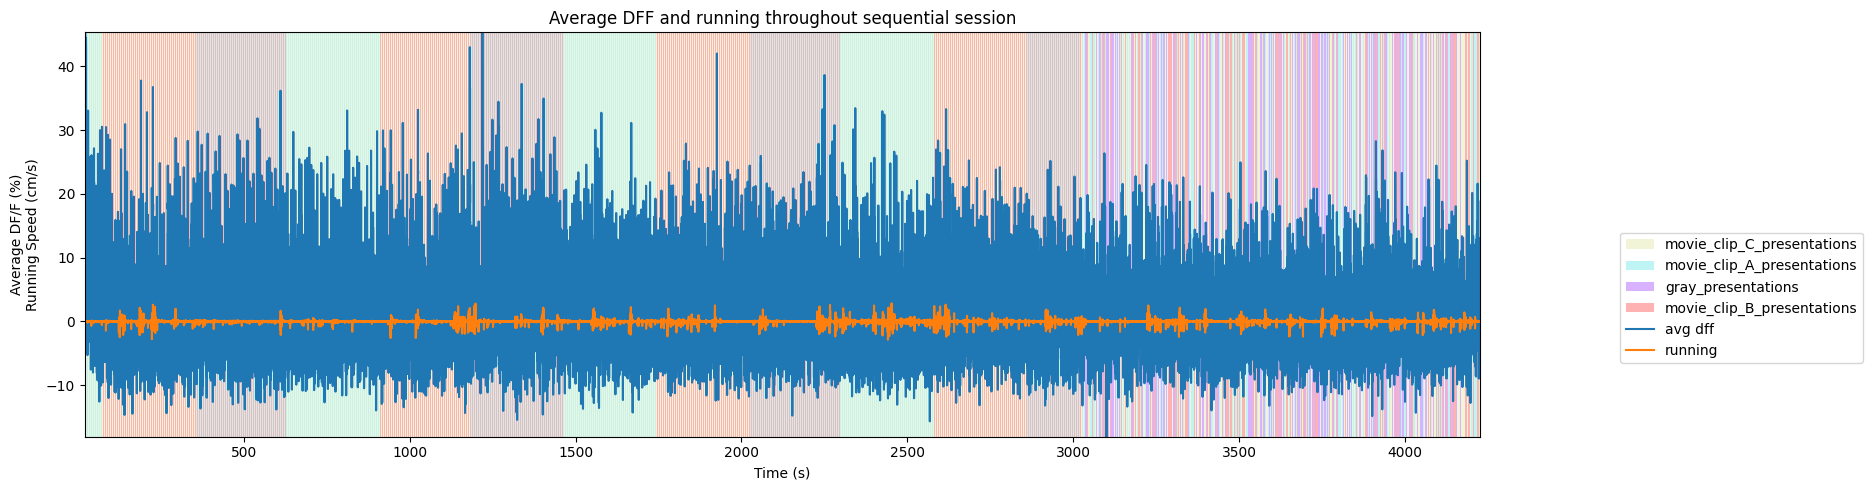

In [26]:
seq_epochs = extract_all_epochs(seq_nwb)

# epochs take the form (stimulus name, stimulus block, start time, stop time)
print("Num epochs:",len(seq_epochs))
seq_epochs.sort(key=lambda x: x[2])
for epoch in seq_epochs:
    print(epoch)

# can set these manually to get a closer look at the timeline
time_start = min(seq_epochs, key=lambda epoch: epoch[1])[1]
time_end = max(seq_epochs, key=lambda epoch:epoch[2])[2]
# time_start = 3000
# time_end = 3100

# can set this to change what trace is displayed alongside epochs
display_trace = seq_avg_dff_trace * 100 # to yield percentage
# unit_idx = 30
# display_trace = dff_trace[:,unit_idx] * 100

# adjust these to zoom in to a narrow slice of time
start, stop = None, None
ax = plot_trace_over_epochs([display_trace, seq_running_trace], [seq_dff_timestamps, seq_running_timestamps], seq_epochs, start, stop, "Average DFF and running throughout sequential session", ['avg dff', 'running'], ["Average DF/F (%)","Running Speed (cm/s)"], "Time (s)")
plt.tight_layout()
plt.show()

{'movie_clip_B_presentations': <matplotlib.patches.Rectangle object at 0x00000246F4D3CEB0>, 'movie_clip_A_presentations': <matplotlib.patches.Rectangle object at 0x00000246F4D3CAF0>, 'movie_clip_C_presentations': <matplotlib.patches.Rectangle object at 0x00000246F4D3CCD0>, 'avg dff': <matplotlib.lines.Line2D object at 0x00000246F4D3D180>, 'running': <matplotlib.lines.Line2D object at 0x00000246F4D3D420>}


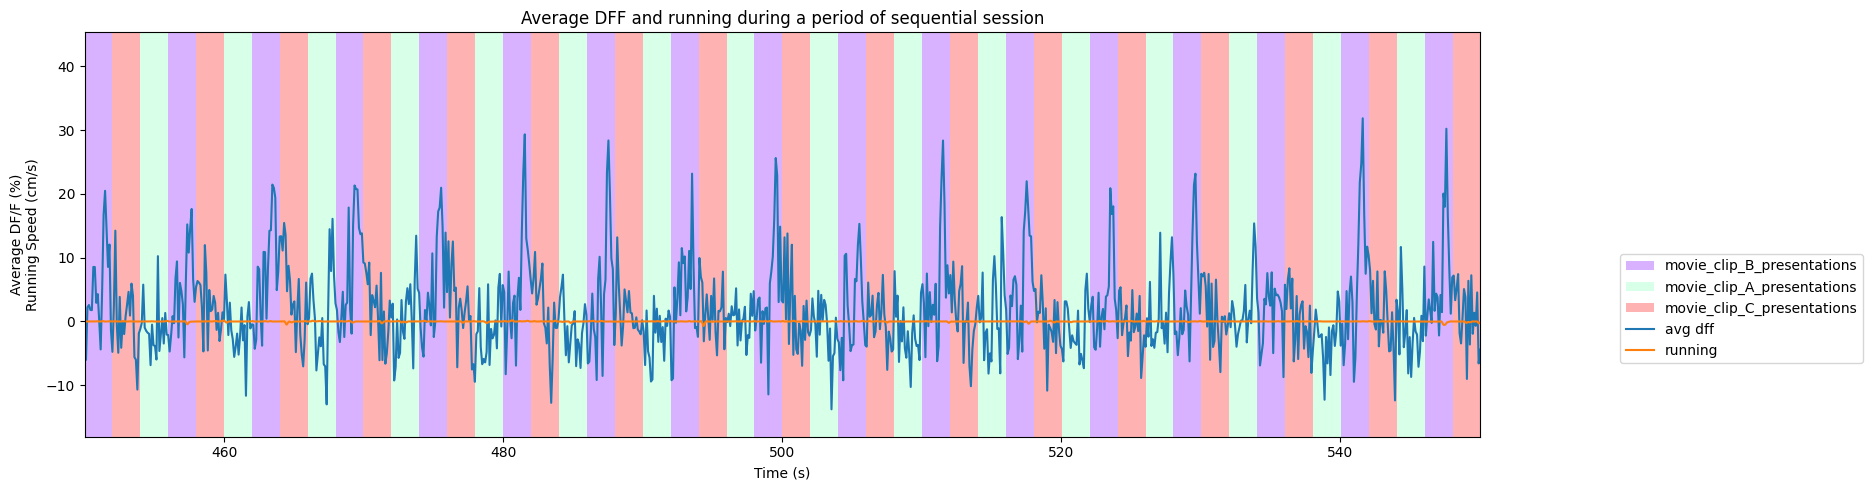

In [27]:
# adjust these to zoom in to a narrow slice of time
start, stop = 450, 550 
ax = plot_trace_over_epochs([display_trace, seq_running_trace], [seq_dff_timestamps, seq_running_timestamps], seq_epochs, start, stop, "Average DFF and running during a period of sequential session", ['avg dff', 'running'], ["Average DF/F (%)","Running Speed (cm/s)"], "Time (s)")
plt.tight_layout()
plt.show()

Num epochs: 2100
{'movie_clip_A_presentations': <matplotlib.patches.Rectangle object at 0x00000246EEBE2650>, 'movie_clip_C_presentations': <matplotlib.patches.Rectangle object at 0x00000246EEC40490>, 'gray_presentations': <matplotlib.patches.Rectangle object at 0x00000246EEBE3910>, 'movie_clip_B_presentations': <matplotlib.patches.Rectangle object at 0x00000246EEBE3CD0>, 'avg dff': <matplotlib.lines.Line2D object at 0x00000246EEC40760>, 'running': <matplotlib.lines.Line2D object at 0x00000246EEC40A00>}


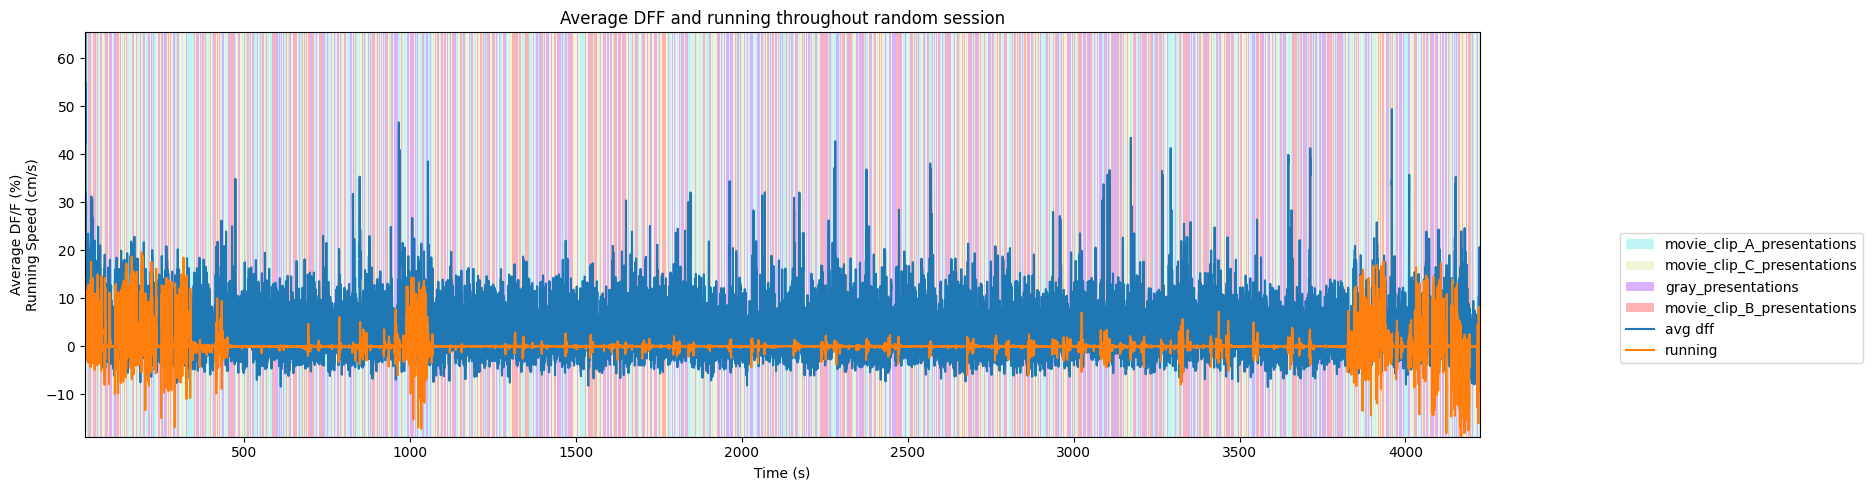

In [28]:
rand_epochs = extract_all_epochs(rand_nwb)

# epochs take the form (stimulus name, stimulus block, start time, stop time)
print("Num epochs:",len(rand_epochs))
rand_epochs.sort(key=lambda x: x[2])
# for epoch in rand_epochs:
#     print(epoch)

# can set these manually to get a closer look at the timeline
time_start = min(rand_epochs, key=lambda epoch: epoch[1])[1]
time_end = max(rand_epochs, key=lambda epoch:epoch[2])[2]
# time_start = 3000
# time_end = 3100

# can set this to change what trace is displayed alongside epochs
display_trace = rand_avg_dff_trace * 100 # to yield percentage
# unit_idx = 30
# display_trace = dff_trace[:,unit_idx] * 100

# adjust these to zoom in to a narrow slice of time
start, stop = None, None
ax = plot_trace_over_epochs([display_trace, rand_running_trace], [rand_dff_timestamps, rand_running_timestamps], rand_epochs, start, stop, "Average DFF and running throughout random session", ['avg dff', 'running'], ["Average DF/F (%)","Running Speed (cm/s)"], "Time (s)")
plt.tight_layout()
plt.show()

### Viewing Eye Tracking
In addition to the running, our NWB files also come with eye tracking of the mouse throughout the session. Below is plotted the angle of the eye of the subject over time. The plot can be tailored to create the best view, as there are frequently large outliers in the eye tracking.

In [29]:
eye_tracking = seq_nwb.acquisition["EyeTracking"]

In [30]:
# extract coords from eye tracking array
xs = np.array([point[0] for point in eye_tracking.eye_tracking.data])
ys = np.array([point[1] for point in eye_tracking.eye_tracking.data])

et_start_idx = 0
et_end_idx = len(eye_tracking.eye_tracking.data)
print("Min X:", np.nanmin(xs), "Max X:", np.nanmax(xs))
print("Min Y:", np.nanmin(ys), "Max Y:", np.nanmax(ys))

Min X: 204.59171406795892 Max X: 375.82160192968314
Min Y: 237.97451381644632 Max Y: 310.8630755675692


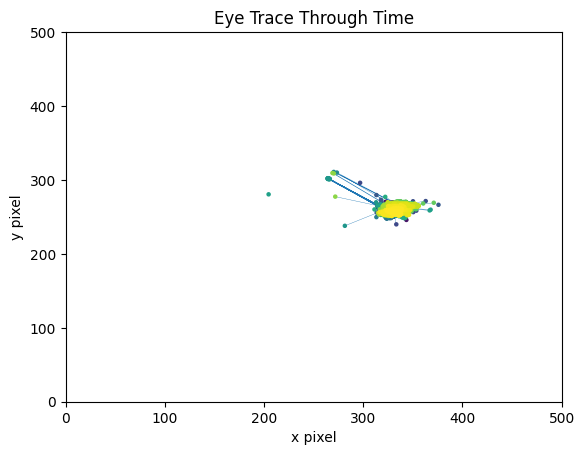

In [31]:
fig, ax = plt.subplots()
colors = plt.cm.viridis(np.linspace(0, 1, et_end_idx-et_start_idx))
ax.plot(xs[et_start_idx:et_end_idx], ys[et_start_idx:et_end_idx], zorder=0, linewidth=0.25)
ax.scatter(xs[et_start_idx:et_end_idx], ys[et_start_idx:et_end_idx], s=5, c=colors, zorder=1)

# change these to set the plot limits (there are sometimes unusual outliers)
ax.set_xlim(0,500)
ax.set_ylim(0,500)

ax.set_xlabel("x pixel")
ax.set_ylabel("y pixel")
ax.set_title("Eye Trace Through Time")
plt.show()

### Generating Response Windows
With the selected trial times above, `seq_stim_times` and `rand_stim_times`, aligned responses to these trials throughout the session can be plotted. To align in time, the DF/F traces must first be interpolated. The code below calculates these 'neuronwise response windows'.

In [32]:
window_start_time = -2
window_end_time = 3
interp_hz = 10

In [33]:
# generate regularly-space x values and interpolate along it
time_axis = np.arange(seq_dff_timestamps[0], seq_dff_timestamps[-1], step=(1/interp_hz))
interp_dff = []

# interpolate channel by channel to save RAM
for channel in range(seq_dff_trace.shape[1]):
    f = interpolate.interp1d(seq_dff_timestamps, seq_dff_trace[:,channel], axis=0, kind="nearest", fill_value="extrapolate")
    interp_dff.append(f(time_axis))

interp_dff = np.array(interp_dff)

print(interp_dff.shape)

(6, 42046)


In [34]:
# validate window bounds
if window_start_time > 0:
    raise ValueError("start time must be non-positive number")
if window_end_time <= 0:
    raise ValueError("end time must be positive number")
    
# get event windows
windows = []
window_length = int((window_end_time-window_start_time) * interp_hz)

for stim_ts in seq_stim_times:
    # convert time to index
    start_idx = int( (stim_ts + window_start_time - seq_dff_timestamps[0]) * interp_hz )
    end_idx = start_idx + window_length
 
    # bounds checking
    if start_idx < 0 or end_idx > interp_dff.shape[1]:
        continue
        
    windows.append(interp_dff[:,start_idx:end_idx])
    
if len(windows) == 0:
    raise ValueError("There are no windows for these timestamps")

windows = np.array(windows) * 100 # x100 to convert values to dF/F percentage
neuronwise_windows = np.swapaxes(windows,0,1)

print(neuronwise_windows.shape)

(6, 650, 50)


### Showing Response Windows

In [35]:
%matplotlib inline
def show_dff_response(ax, dff, window_start_time, window_end_time, aspect="auto", vmin=None, vmax=None, yticklabels=[], skipticks=1, xlabel="Time (s)", ylabel="ROI", cbar=True, cbar_label=None):
    if len(dff) == 0:
        print("Input data has length 0; Nothing to display")
        return

    img = ax.imshow(dff, aspect=aspect, extent=[window_start_time, window_end_time, 0, len(dff)], vmin=vmin, vmax=vmax)
    if cbar:
        ax.colorbar(img, shrink=0.5, label=cbar_label)

    ax.plot([0,0],[0, len(dff)], ":", color="white", linewidth=1.0)

    if len(yticklabels) != 0:
        ax.set_yticks(range(len(yticklabels)))
        ax.set_yticklabels(yticklabels, fontsize=8)

        n_ticks = len(yticklabels[::skipticks])
        ax.yaxis.set_major_locator(plt.MaxNLocator(n_ticks))

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [36]:
def show_many_responses(windows, rows, cols, window_idxs=None, title=None, subplot_title="", xlabel=None, ylabel=None, cbar_label=None, vmin=0, vmax=100):
    if window_idxs is None:
        window_idxs = range(len(windows))
    windows = windows[window_idxs]
    
    # handle case with no input data
    if len(windows) == 0:
        print("Input data has length 0; Nothing to display")
        return
    # handle cases when there aren't enough windows for number of rows
    if len(windows) < rows*cols:
        rows = (len(windows) // cols) + 1

    fig, axes = plt.subplots(rows, cols, figsize=(2*cols+2, 2*rows+2), layout="constrained")
    # handle case when there's only one row
    if len(axes.shape) == 1:
        axes = axes.reshape((1, axes.shape[0]))
    
    for i in range(rows*cols):
        ax_row = int(i // cols)
        ax_col = i % cols
        ax = axes[ax_row][ax_col]
        
        if i > len(windows)-1:
            ax.set_visible(False)
            continue

        window = windows[i]
        show_dff_response(ax, window, window_start_time, window_end_time, xlabel=xlabel, ylabel=ylabel, cbar=False, vmin=vmin, vmax=vmax)
        ax.set_title(f"{subplot_title} {window_idxs[i]}")
        if ax_row != rows-1:
            ax.get_xaxis().set_visible(False)
        if ax_col != 0:
            ax.get_yaxis().set_visible(False)

    fig.suptitle(title)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    colorbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm), ax=axes, shrink=1.5/rows, label=cbar_label)

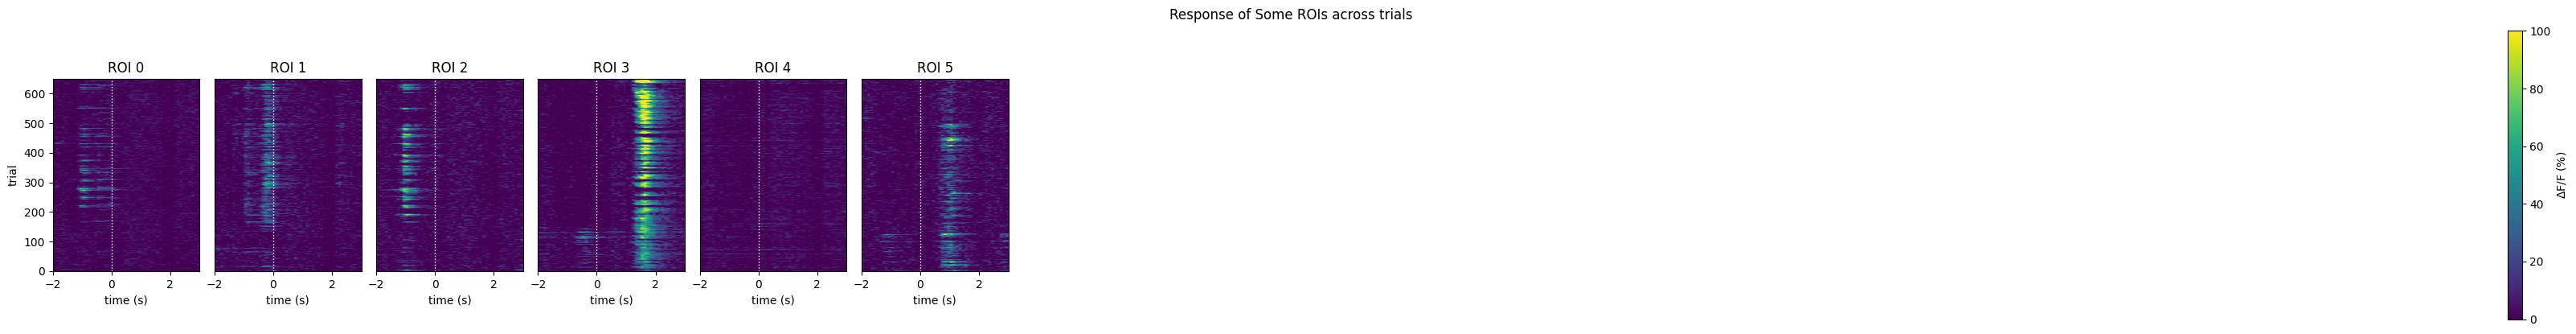

In [37]:
show_many_responses(neuronwise_windows,
                    6,
                    15,
                    title="Response of Some ROIs across trials",
                    subplot_title="ROI",
                    xlabel="time (s)",
                    ylabel="trial",
                    cbar_label="$\Delta$F/F (%)")

### Selecting Cells

In [38]:
# get the index within the window that stimulus occurs (time 0)
stimulus_onset_idx = int(-window_start_time * interp_hz)
baseline = windows[:,:,0:stimulus_onset_idx]
evoked_responses = windows[:,:,stimulus_onset_idx:]

print(stimulus_onset_idx)
print(baseline.shape)
print(evoked_responses.shape)

20
(650, 6, 20)
(650, 6, 30)


In [39]:
mean_trial_responses = np.mean(evoked_responses, axis=2)
mean_trial_baselines = np.mean(baseline, axis=2)

n = mean_trial_responses.shape[0]
t,p = ttest_ind(mean_trial_responses, mean_trial_baselines)
IC3_selected_rois = np.where(p < 0.05 / n)[0]
print(f"Selected ROIs {IC3_selected_rois}")

Selected ROIs [0 1 2 3 4 5]


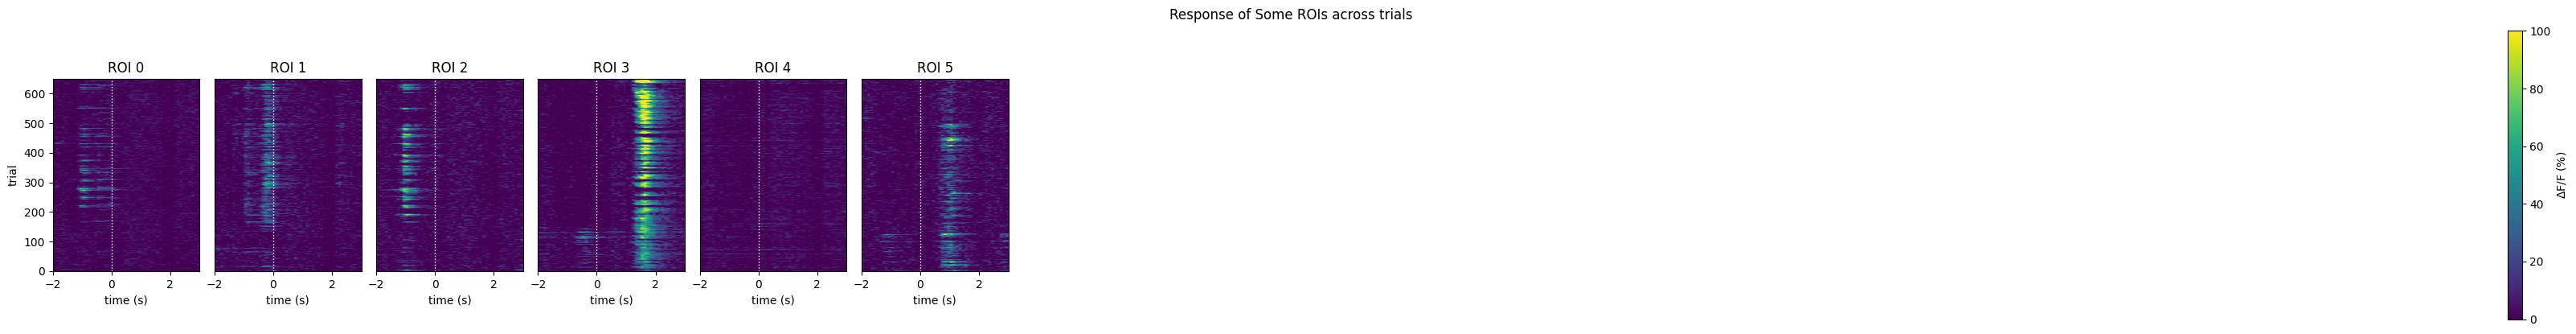

In [40]:
show_many_responses(neuronwise_windows[IC3_selected_rois],
                    6,
                    15,
                    title="Response of Some ROIs across trials",
                    subplot_title="ROI",
                    xlabel="time (s)",
                    ylabel="trial",
                    cbar_label="$\Delta$F/F (%)")

### Viewing Raw Movie
Although not shown in the metadata table shown above, each one of our session files comes with a copy on DANDI that also includes the actual movies from the brain. This is downloaded and displayed below.

In [41]:
dandi_movie_filepath = "sub-686381/sub-686381_ses-1298485241-acq-1298598879-raw-movies_image+ophys.nwb"

In [42]:
# This can sometimes take a while depending on the size of the file
io = dandi_download_open(dandiset_id, dandi_movie_filepath, download_loc, dandi_api_key=dandi_api_key)
nwb = io.read()

File already exists
Opening file


In [43]:
# start_time = flr_timestamps[0]
start_time = 540
# end_time = flr_timestamps[-1]
end_time = 600

In [44]:
start_idx, end_idx = np.searchsorted(seq_dff_timestamps, [start_time, end_time])
print(start_idx)
print(end_idx)

4934
5505


In [45]:
raw_movie = nwb.acquisition["raw_suite2p_motion_corrected"].data
flr_timestamps = np.array(seq_dff.roi_response_series["traces"].timestamps)

print(raw_movie.shape)
print(flr_timestamps.shape)

(39975, 512, 512)
(39976,)


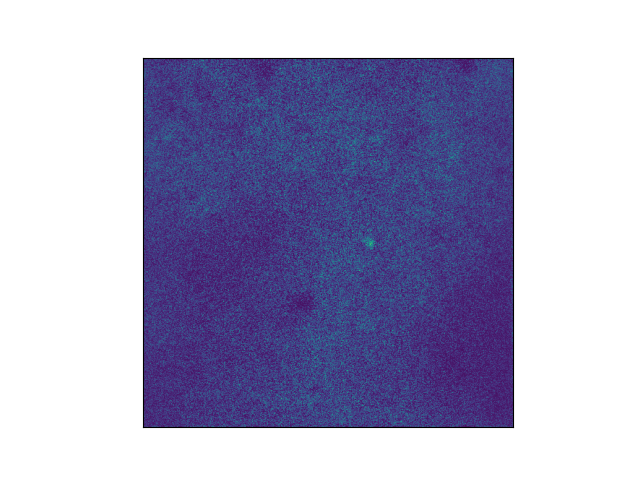

In [46]:
%matplotlib ipympl
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
view = hyperslicer(raw_movie[start_idx:end_idx], play_buttons=True)